In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
def apply_filter(image, filter_size, filter_function):
    # Define the output image
    output_image = np.copy(image)
    
    # Calculate padding
    padding = filter_size // 2
    
    # Iterate over each pixel (excluding border pixels)
    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            # Extract the neighborhood of the current pixel
            window = image[i - padding:i + padding + 1, j - padding:j + padding + 1]
            # Apply the filter function to the window and replace the current pixel value
            output_image[i, j] = filter_function(window)
            
    return output_image

In [8]:
def apply_averaging_filter(image, filter_size=3):
    return apply_filter(image, filter_size, np.mean)

def apply_median_filter(image, filter_size=3):
    return apply_filter(image, filter_size, np.median)

In [9]:
def main(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # prepare to save img
    if not os.path.exists('./OUTPUT'):
        os.mkdir('./OUTPUT')
    base_name = os.path.basename(image_path)
    file_name, _ = os.path.splitext(base_name)
    
    # Define filter sizes to experiment with
    filter_sizes = [3, 5, 7, 9]

    plt.figure(figsize=(10, 3 * len(filter_sizes)))

    # Display the original image
    plt.subplot(len(filter_sizes) + 1, 3, 1), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    for idx, filter_size in enumerate(filter_sizes, start=1):
        averaged_image = apply_averaging_filter(image, filter_size)
        median_image = apply_median_filter(image, filter_size)

        # Save the output images
        cv2.imwrite(f"./OUTPUT/{file_name}_avg_{filter_size}.png", averaged_image)
        cv2.imwrite(f"./OUTPUT/{file_name}_med_{filter_size}.png", median_image)

        # Plotting the results
        plt.subplot(len(filter_sizes) + 1, 3, idx * 3 + 1), plt.imshow(averaged_image, cmap='gray')
        plt.title(f'Averaging Filter {filter_size}x{filter_size}'), plt.xticks([]), plt.yticks([])
        plt.subplot(len(filter_sizes) + 1, 3, idx * 3 + 2), plt.imshow(median_image, cmap='gray')
        plt.title(f'Median Filter {filter_size}x{filter_size}'), plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

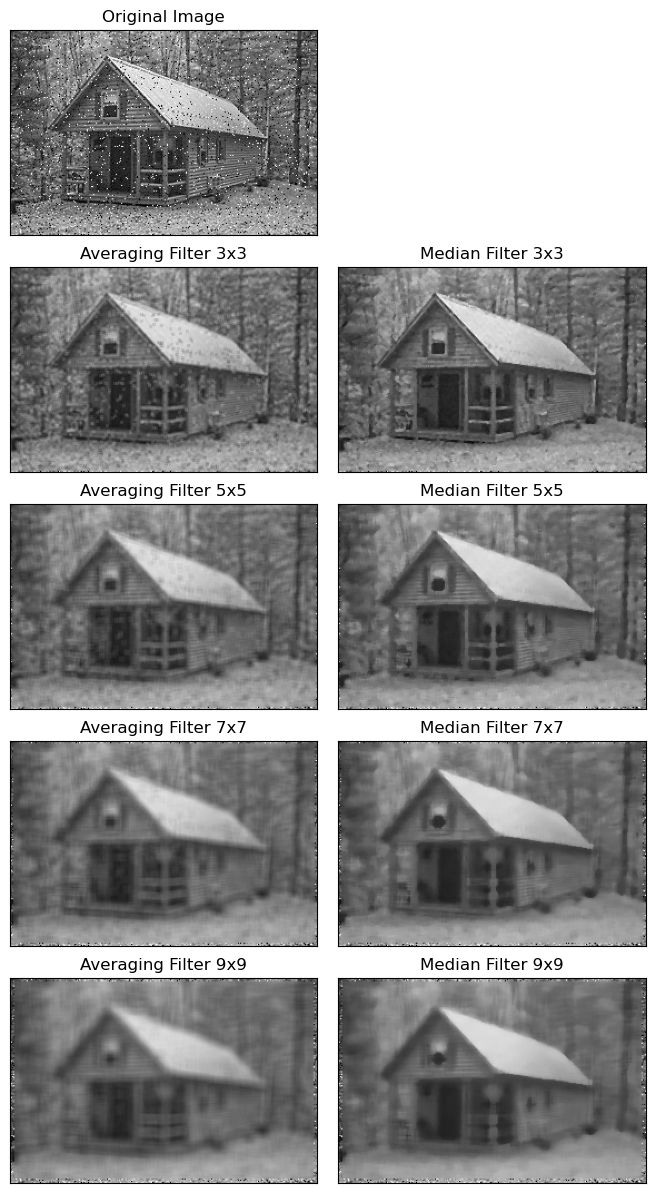

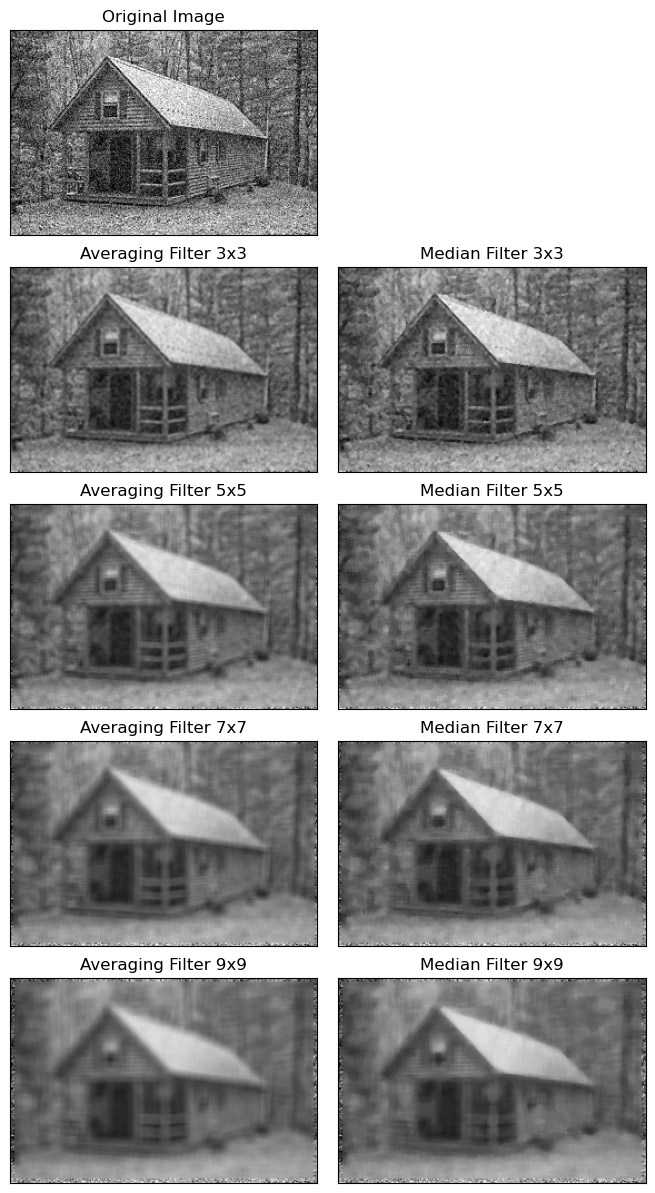

In [10]:
main('../original_images/noisy_img1.jpg')
main('../original_images/noisy_img2.jpg')